In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-data/ERA5_ws_monmean_3hrly_7918.nc
/kaggle/input/climate-data/reanalysis_surge_monmean_7918.nc
/kaggle/input/climate-data/ERA5_sst_monmean_1979-2018.nc
/kaggle/input/climate-data/ERA5_SLP_monmean_1979-2018.nc
/kaggle/input/climate-data/ERA5_swell_shts_3h_monmean_7918.nc
/kaggle/input/climate-data/ERA5_t2m_3hrly_monmean_7918.nc
/kaggle/input/climate-data/ERA5_swh_wind_sea_3h_monmean_7918.nc
/kaggle/input/climate-data/ERA5_MeanWavePeriod_monmean_7918.nc


In [2]:
!pip uninstall scipy -y

Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4


In [3]:
!pip install scipy==1.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 17.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 83.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.4.1 requires cubinlinker, which is not installed.
cudf 24.4.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.4.1 requires ptxcompiler, which is not installed.
cuml 24.4.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.4.1 requires cupy-cuda11x>=12.0.0, which is not installed.
keras-nlp 0.12.1 requ

In [4]:
import scipy
scipy.__version__

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'1.8.1'

In [5]:
!pip uninstall xarray -y

Found existing installation: xarray 2024.5.0
Uninstalling xarray-2024.5.0:
  Successfully uninstalled xarray-2024.5.0


In [6]:
!pip install xarray==0.20.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.7/835.7 kB 10.9 MB/s eta 0:00:0000:010:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.18.0 requires scipy>=1.9.0, but you have scipy 1.8.1 which is incompatible.
arviz 0.18.0 requires xarray>=2022.6.0, but you have xarray 0.20.1 which is incompatible.
xarray-einstats 0.7.0 requires xarray>=2022.09.0, but you have xarray 0.20.1 which is incompatible.


In [7]:
import xarray as xr
xr.__version__

'2024.5.0'

In [8]:
!pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 11.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 58.1 MB/s eta 0:00:00:00:0100:01


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import warnings

In [10]:
df = xr.open_dataset(r'/kaggle/input/climate-data/ERA5_MeanWavePeriod_monmean_7918.nc')
df

<xarray.Dataset> Size: 499MB
Dimensions:    (time: 480, bnds: 2, longitude: 720, latitude: 361)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-16T10:30:00 ... 2018-12-16T1...
  * longitude  (longitude) float32 3kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude   (latitude) float32 1kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 8kB ...
    mwp        (time, latitude, longitude) float32 499MB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon May 20 10:28:44 2024: cdo selyear,1979/2018 ERA5_MeanWa...
    frequency:    mon
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [11]:
df.data_vars

Data variables:
    time_bnds  (time, bnds) datetime64[ns] 8kB ...
    mwp        (time, latitude, longitude) float32 499MB ...

In [12]:
mwp = df['mwp']
mwp_glb = mwp.mean(dim='time',skipna= True)
#mwp_glb = mwp_glb.to_dataframe()
print(mwp)

<xarray.DataArray 'mwp' (time: 480, latitude: 361, longitude: 720)> Size: 499MB
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-16T10:30:00 ... 2018-12-16T1...
  * longitude  (longitude) float32 3kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude   (latitude) float32 1kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
Attributes:
    long_

In [13]:
lat = mwp['latitude']
lon = mwp['longitude']
print(lat[1])

<xarray.DataArray 'latitude' ()> Size: 4B
array(89.5, dtype=float32)
Coordinates:
    latitude  float32 4B 89.5
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y


In [14]:
kandla = mwp.isel(latitude = [134,135,136,137,138],longitude = [134,135,136,137,138])
mumbai = mwp.isel(latitude = [141,142,143,144,145],longitude = [141,142,143,144,145])
chennai =  mwp.isel(latitude = [151,152,153,154,155],longitude = [161,162,163,164,165])
kochi = mwp.isel(latitude = [158,159,160,161,162],longitude = [148,149,150,151,152])
vishakhapatnam = mwp.isel(latitude=[144,145,146,147,148],longitude = [167,168,169,170,171])
paradip = mwp.isel(latitude = [137,138,139,40,141],longitude = [175,176,177,178,179])

**Null value Check**

In [15]:
np.isnan(np.array(kandla)).sum()

0

**Location Wise Plots,Mean,Satndard Deviation and other stats**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

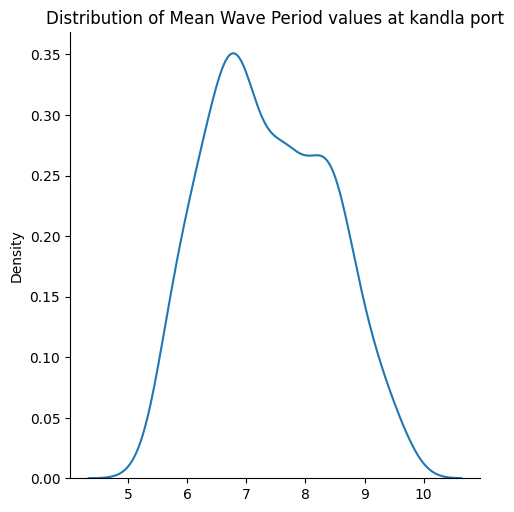

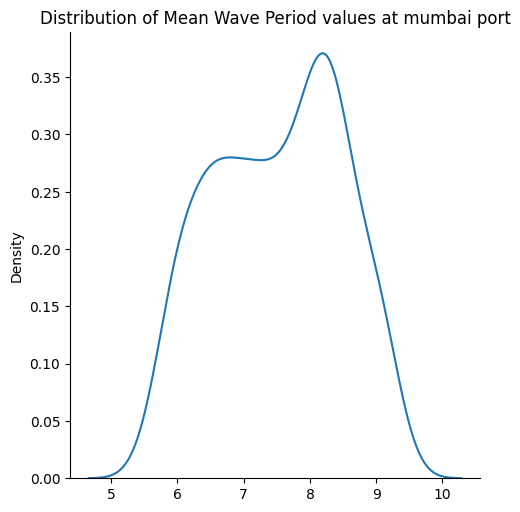

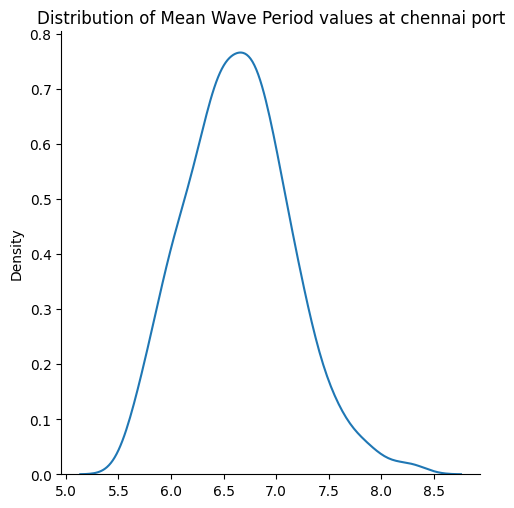

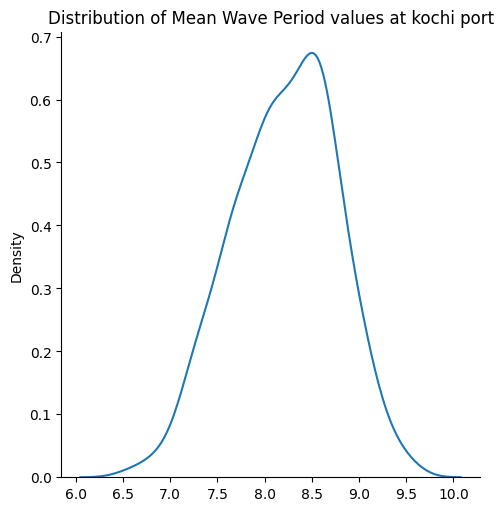

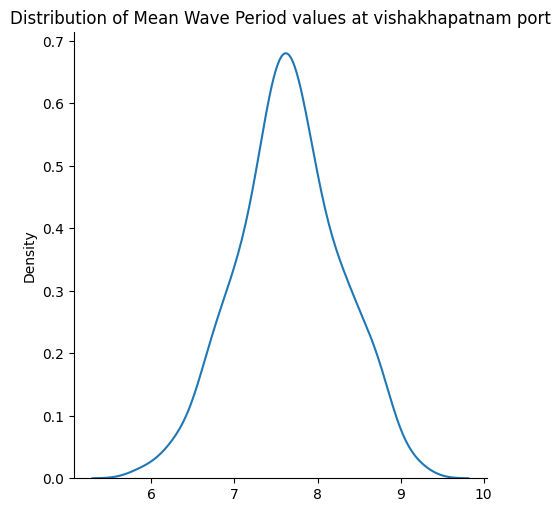

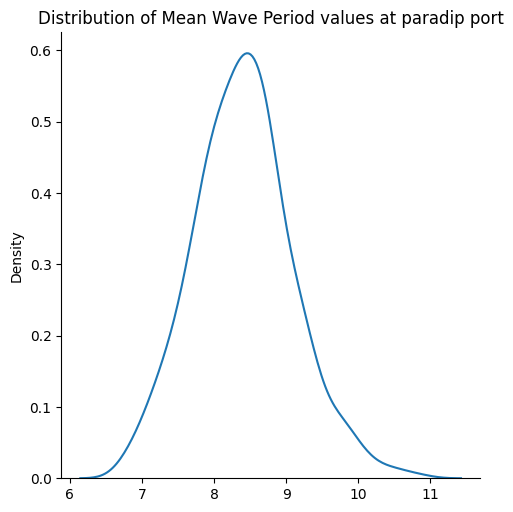

In [16]:
location = {'kandla':kandla,'mumbai':mumbai,'chennai':chennai,'kochi':kochi,'vishakhapatnam':vishakhapatnam,'paradip':paradip}
keys = list(location.keys())
mwp_location_tsl = {}
for i in keys:
    mwp_location_tsl[i] = location[i].mean(dim = 'latitude',skipna = True).mean(dim = 'longitude',skipna = True)
for i in range(len(mwp_location_tsl)):
        sns.displot(data = mwp_location_tsl[keys[i]],kind = 'kde').set(title = f'Distribution of Mean Wave Period values at {keys[i]} port')
        #plt.savefig(f'Distribution of Mean Wave Period values at {keys[i]} port.png')
mwp_l_std = {}
for i in range(len(mwp_location_tsl)):
    location_avg = mwp_location_tsl[keys[i]].mean(dim = 'time',skipna = True)
    #print(f'{keys[i]} port avg. mwp is = {float(location_avg)} seconds')
    loc_gsp = location[keys[i]].mean(dim = 'time')
    mwp_l_std[keys[i]] = float(loc_gsp.std())
df = pd.DataFrame(mwp_location_tsl)
df_temp = df
df = df.assign(months = mwp['time'])
keys_temp = list(df.keys())
keys_temp.remove('months')
keys_temp.insert(0,'months')
df = df.reindex(columns = keys_temp)
df_csv = df.to_csv('mwp_ts.csv',index = True)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)
df_descriptive = df.describe()
df_descriptive = df_descriptive.drop(columns =['months'])
skew = []
for i in list(df_temp.columns):
    skew.append(df_temp[i].skew())
df_descriptive.loc['skewness'] = skew
df_descriptive
df_descriptive.to_csv('desciptive_stats_mwp.csv')

****Timeseries Plots

<Figure size 1000x500 with 0 Axes>

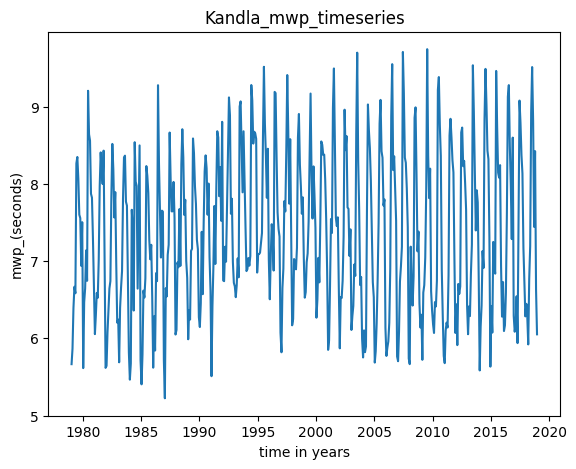

In [17]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('Kandla_mwp_timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('mwp_(seconds)')
ax.plot(mwp['time'],mwp_location_tsl['kandla'])


<Figure size 1000x500 with 0 Axes>

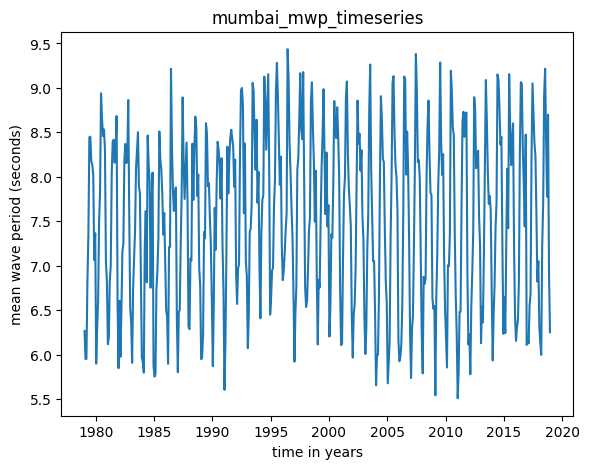

In [18]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('mumbai_mwp_timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('mean wave period (seconds)')
ax.plot(mwp['time'],mwp_location_tsl['mumbai'])


<Figure size 1000x500 with 0 Axes>

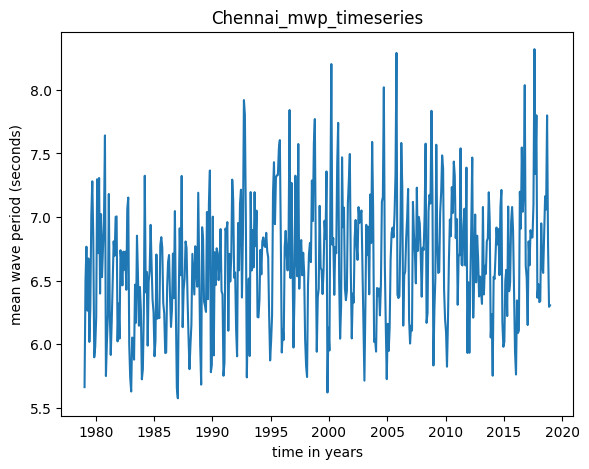

In [19]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('Chennai_mwp_timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('mean wave period (seconds)')
ax.plot(mwp['time'],mwp_location_tsl['chennai'])


<Figure size 1000x500 with 0 Axes>

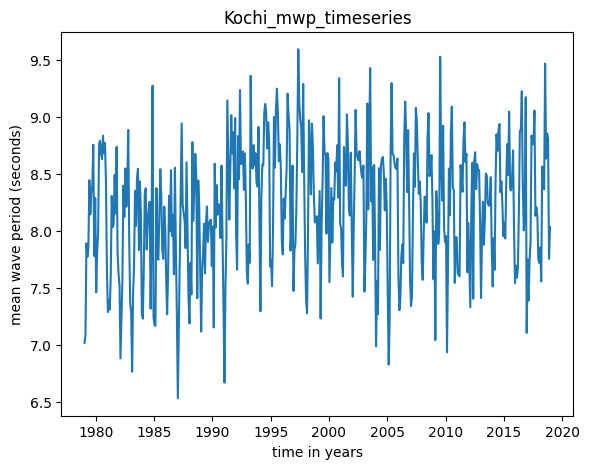

In [20]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('Kochi_mwp_timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('mean wave period (seconds)')
ax.plot(mwp['time'],mwp_location_tsl['kochi'])

<Figure size 1000x500 with 0 Axes>

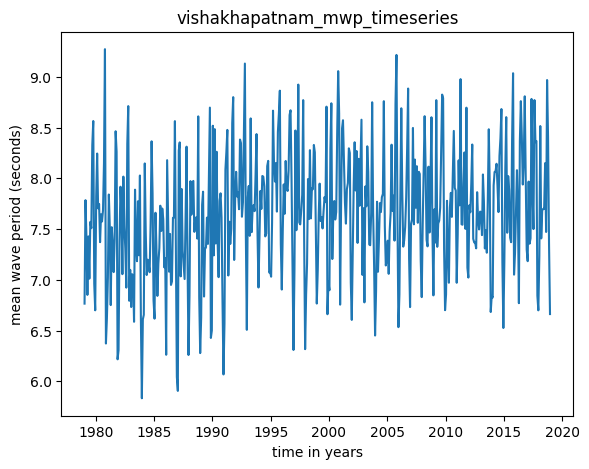

In [21]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('vishakhapatnam_mwp_timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('mean wave period (seconds)')
ax.plot(mwp['time'],mwp_location_tsl['vishakhapatnam'])


<Figure size 1000x500 with 0 Axes>

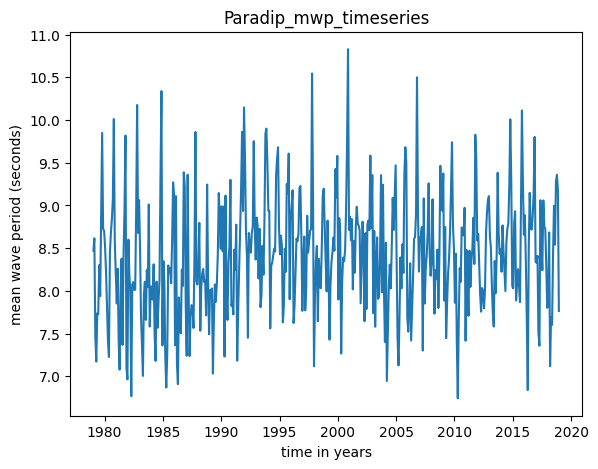

In [22]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('Paradip_mwp_timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('mean wave period (seconds)')
ax.plot(mwp['time'],mwp_location_tsl['paradip'])


Text(0.5, 1.0, 'Choropleth map of mean wave period on the indian ocean')

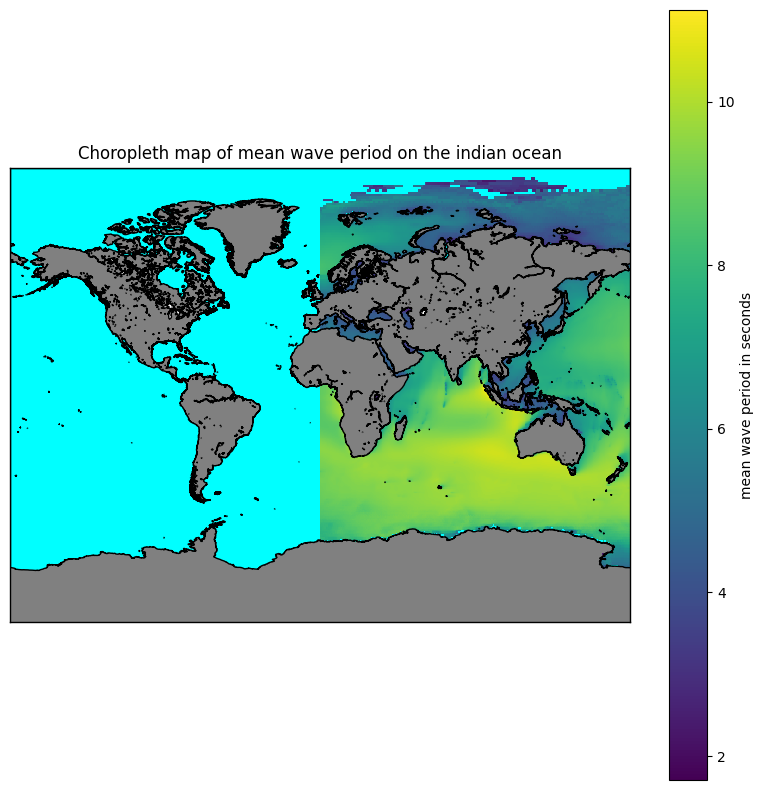

In [23]:
plt.figure(figsize = (10,10))
m = Basemap(projection = 'mill',resolution = 'i' )#,llcrnrlat = 8.0,llcrnrlon = 65,urcrnrlat = 40.0,urcrnrlon = 100)
m.drawcoastlines()
m.fillcontinents(color='grey')
m.drawmapboundary(fill_color = 'aqua')
#Plotting the 2d data
lats,lons = np.meshgrid(np.array(mwp['longitude']),np.array(mwp['latitude']),indexing = 'ij')
x,y = m(lats,lons)
cs = m.pcolormesh(x,y,mwp_glb.T,cmap = 'viridis')
plt.colorbar(cs,label = 'mean wave period in seconds' )
plt.title('Choropleth map of mean wave period on the indian ocean')


In [24]:
df_2 = xr.open_dataset(r'/kaggle/input/climate-data/ERA5_SLP_monmean_1979-2018.nc')
print(df_2)

<xarray.Dataset> Size: 4GB
Dimensions:    (time: 480, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-16T09:00:00 ... 2018-12-16T0...
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 8kB ...
    msl        (time, latitude, longitude) float64 4GB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat May 18 18:49:30 2024: cdo selyear,1979/2018 ERA5_SLP_mo...
    frequency:    mon
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...


In [25]:
df_2.data_vars

Data variables:
    time_bnds  (time, bnds) datetime64[ns] 8kB ...
    msl        (time, latitude, longitude) float64 4GB ...

**global Plot**

Text(0.5, 1.0, 'Choropleth map of mean sea level Pressure on the indian Subcontinent')

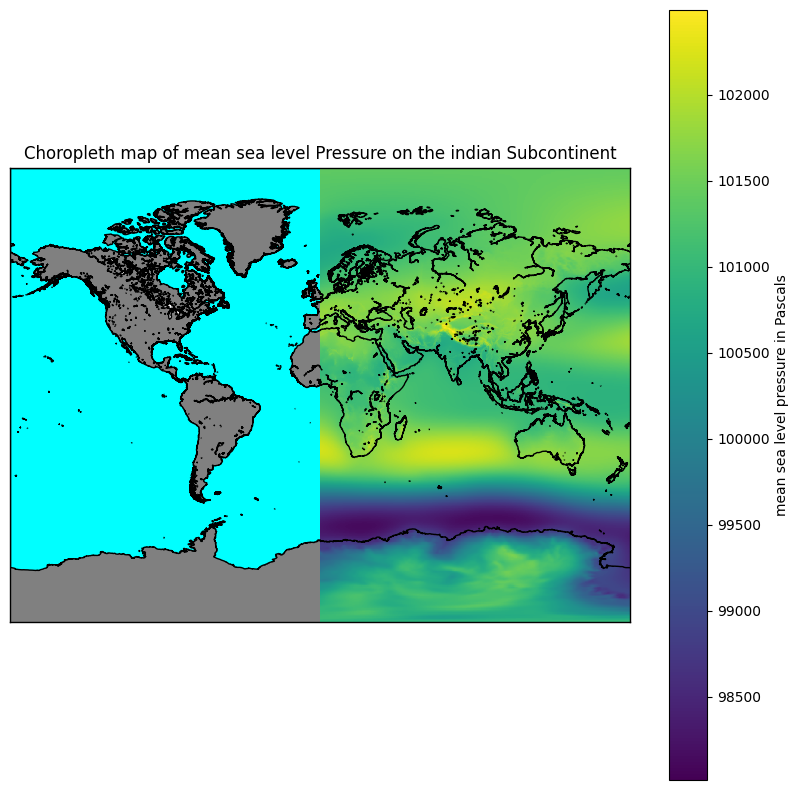

In [26]:
mslp = df_2['msl']

mslp_glb = mslp.mean(dim='time',skipna = True)
plt.figure(figsize = (10,10))
m = Basemap(projection = 'mill',resolution = 'i')#llcrnrlat = 8.0,llcrnrlon = 65,urcrnrlat = 40.0,urcrnrlon = 100)
m.drawcoastlines()
m.fillcontinents(color='grey')
m.drawmapboundary(fill_color = 'aqua')
#Plotting the 2d data
lats,lons = np.meshgrid(np.array(mslp['longitude']),np.array(mslp['latitude']),indexing = 'ij')
x,y = m(lats,lons)
cs = m.pcolormesh(x,y,mslp_glb.T, cmap = 'viridis')
plt.colorbar(cs,label = 'mean sea level pressure in Pascals' )
plt.title('Choropleth map of mean sea level Pressure on the indian Subcontinent')


**Locations**

In [27]:
kandla_slp = mslp.isel(latitude = np.arange(268,276,1),longitude=np.arange(268,276,1))
mumbai_slp = mslp.isel(latitude = np.arange(282,290,1),longitude= np.arange(282,290,1))
chennai_slp =  mslp.isel(latitude = np.arange(302,310,1),longitude = np.arange(322,330,1))
kochi_slp = mslp.isel(latitude = np.arange(316,324,1),longitude = np.arange(296,304,1))
vishakhapatnam_slp = mslp.isel(latitude=np.arange(288,296,1),longitude = np.arange(334,342,1))
paradip_slp = mslp.isel(latitude = np.arange(274,282,1),longitude =np.arange(350,358,1))

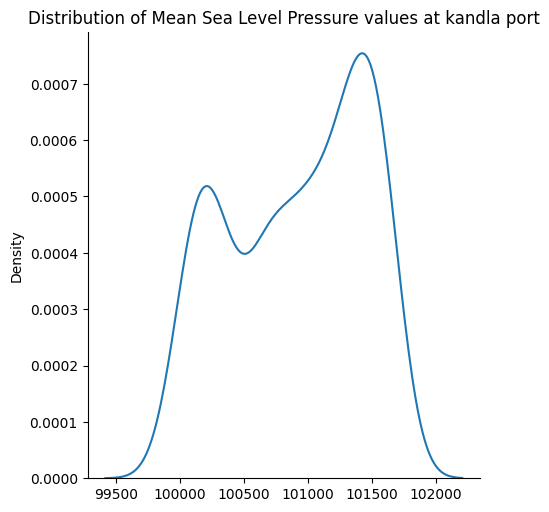

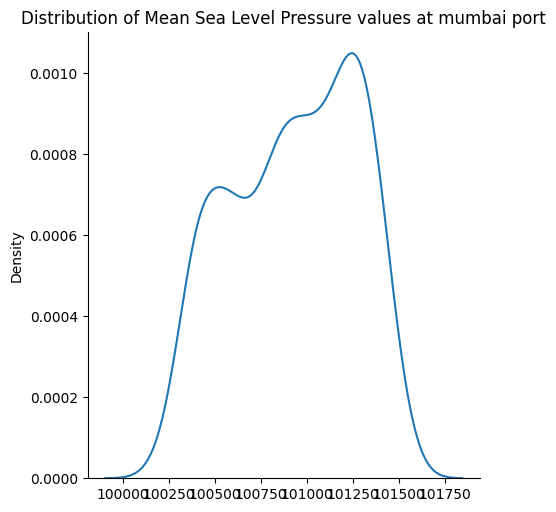

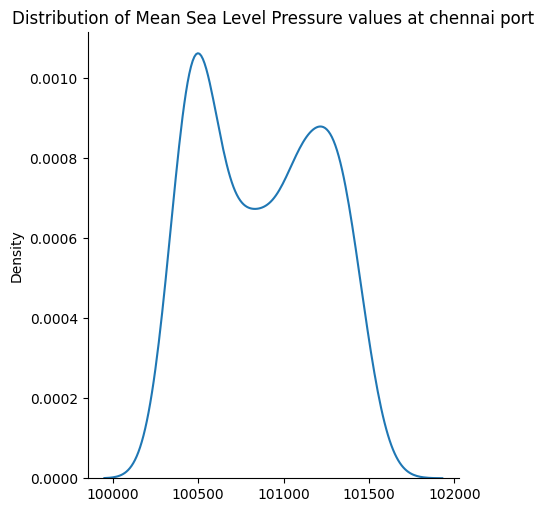

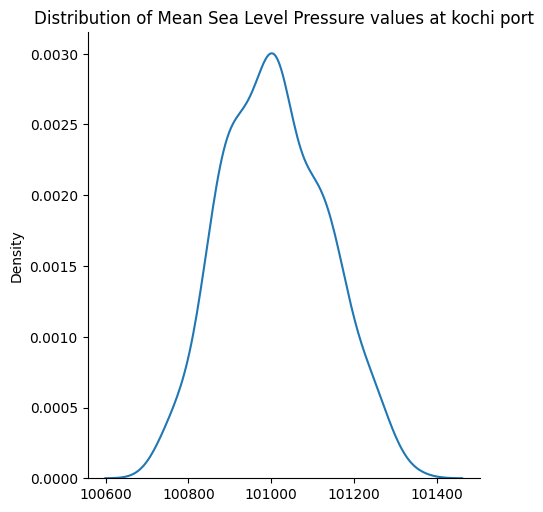

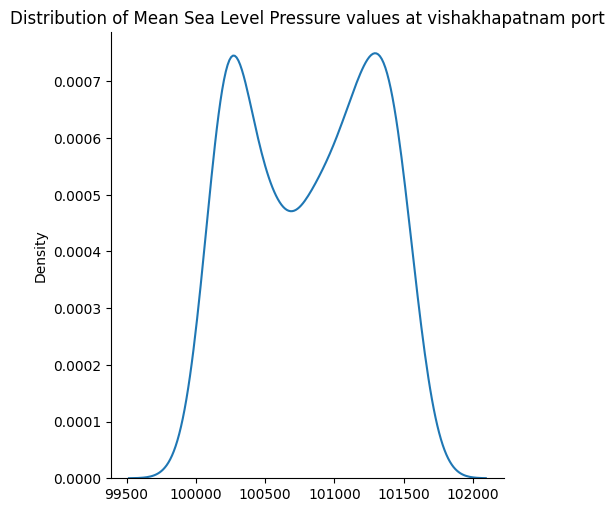

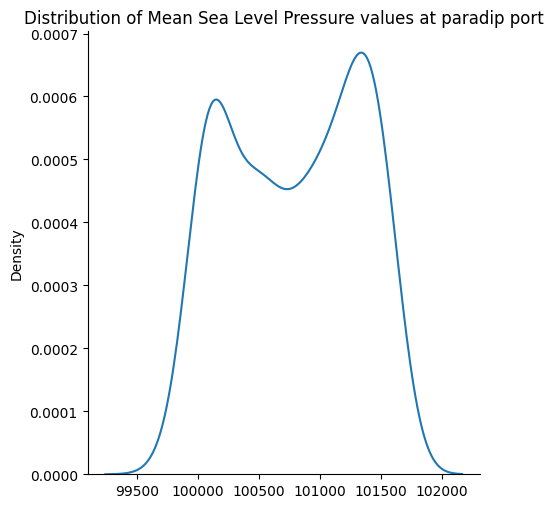

In [28]:
location = {'kandla':kandla_slp,'mumbai':mumbai_slp,'chennai':chennai_slp,'kochi':kochi_slp,'vishakhapatnam':vishakhapatnam_slp,'paradip':paradip_slp}
keys = list(location.keys())
mslp_location_tsl = {}
for i in keys:
    mslp_location_tsl[i] = location[i].mean(dim = 'latitude',skipna = True).mean(dim = 'longitude',skipna = True)
for i in range(len(mslp_location_tsl)):
        sns.displot(data = mslp_location_tsl[keys[i]],kind = 'kde').set(title = f'Distribution of Mean Sea Level Pressure values at {keys[i]} port')
        
for i in range(len(mslp_location_tsl)):
    loc_gsp = location[keys[i]].mean(dim = 'time')
df = pd.DataFrame(mslp_location_tsl)
df_temp = df
#print(df)
df = df.assign(months = mslp['time'])
keys_temp = list(df.keys())
keys_temp.remove('months')
keys_temp.insert(0,'months')
df = df.reindex(columns = keys_temp)
df_csv = df.to_csv('mslp_ts.csv',index = True)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)
df_descriptive = df.describe()
df_descriptive = df_descriptive.drop(columns =['months'])
skew = []
for i in list(df_temp.columns):
    skew.append(df_temp[i].skew())
df_descriptive.loc['skewness'] = skew
df_descriptive
df_descriptive.to_csv('desciptive_stats.csv')


<Figure size 1000x500 with 0 Axes>

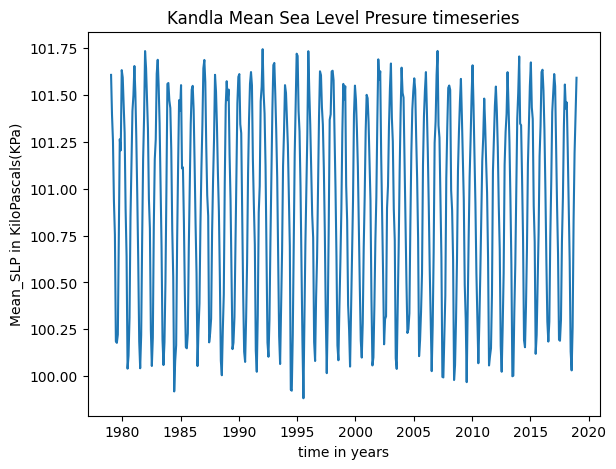

In [29]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('Kandla Mean Sea Level Presure timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('Mean_SLP in KiloPascals(KPa)')
ax.plot(mslp['time'],np.array(mslp_location_tsl['kandla'])/1000)


<Figure size 1000x500 with 0 Axes>

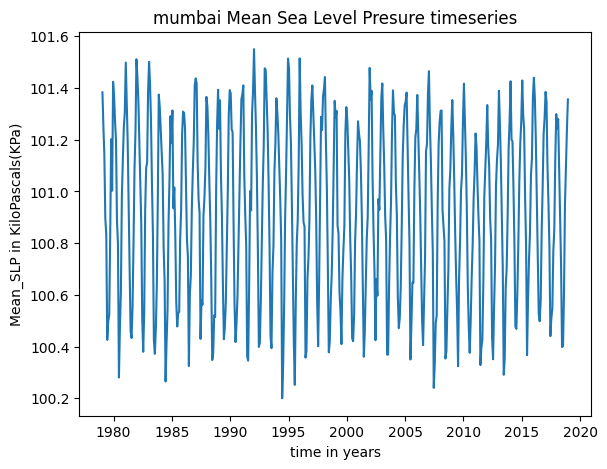

In [30]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('mumbai Mean Sea Level Presure timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('Mean_SLP in KiloPascals(KPa)')
ax.plot(mslp['time'],np.array(mslp_location_tsl['mumbai'])/1000)


<Figure size 1000x500 with 0 Axes>

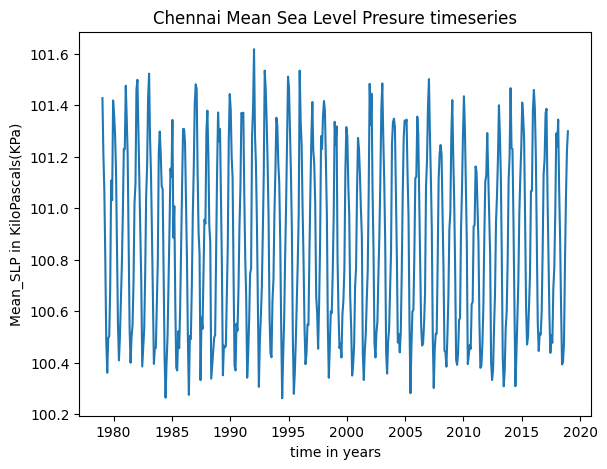

In [31]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('Chennai Mean Sea Level Presure timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('Mean_SLP in KiloPascals(KPa)')
ax.plot(mslp['time'],np.array(mslp_location_tsl['chennai'])/1000)


<Figure size 1000x500 with 0 Axes>

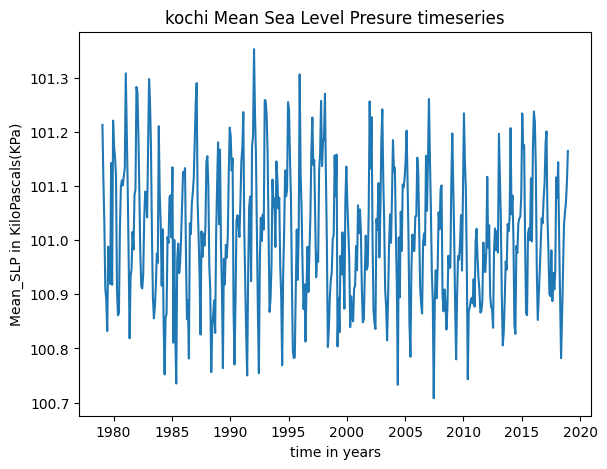

In [32]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('kochi Mean Sea Level Presure timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('Mean_SLP in KiloPascals(KPa)')
ax.plot(mslp['time'],np.array(mslp_location_tsl['kochi'])/1000)


<Figure size 1000x500 with 0 Axes>

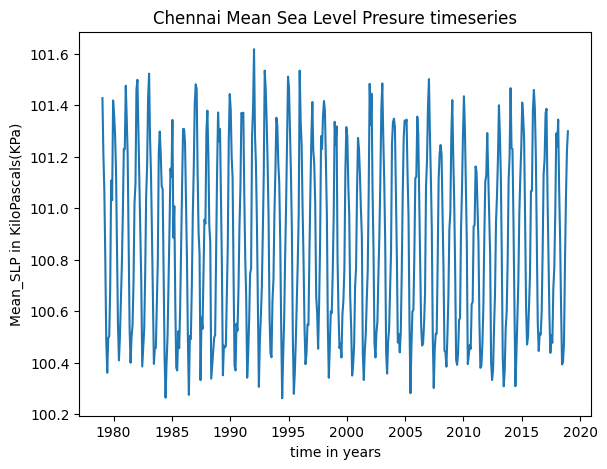

In [33]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('Chennai Mean Sea Level Presure timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('Mean_SLP in KiloPascals(KPa)')
ax.plot(mslp['time'],np.array(mslp_location_tsl['chennai'])/1000)

<Figure size 1000x500 with 0 Axes>

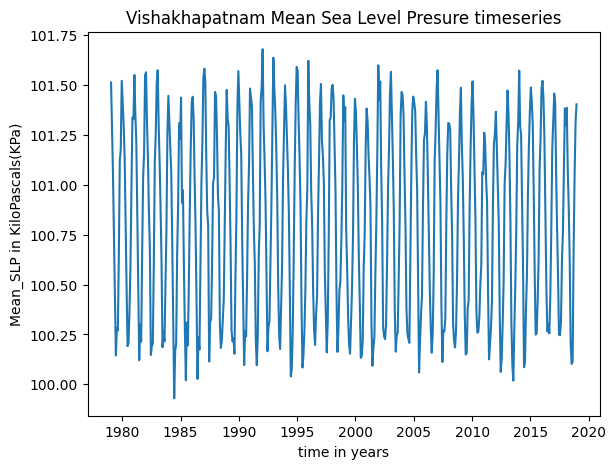

In [34]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('Vishakhapatnam Mean Sea Level Presure timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('Mean_SLP in KiloPascals(KPa)')
ax.plot(mslp['time'],np.array(mslp_location_tsl['vishakhapatnam'])/1000)


<Figure size 1000x500 with 0 Axes>

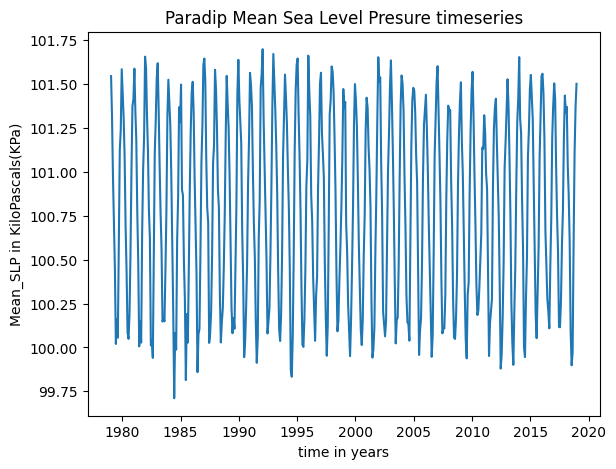

In [35]:
plt.figure(figsize = (10,5))
fig,ax = plt.subplots(1,1)
# spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.95)
ax.set_title('Paradip Mean Sea Level Presure timeseries')
ax.set_xlabel('time in years')
ax.set_ylabel('Mean_SLP in KiloPascals(KPa)')
ax.plot(mslp['time'],np.array(mslp_location_tsl['paradip'])/1000)


In [36]:
df_3 = xr.open_dataset(r'/kaggle/input/climate-data/ERA5_sst_monmean_1979-2018.nc')
sst = df_3['sst']
print(sst)

<xarray.DataArray 'sst' (time: 480, latitude: 721, longitude: 1440)> Size: 4GB
[498355200 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-16T09:00:00 ... 2018-12-16T0...
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
Attributes:
    long_name:  Sea surface temperature
    units:      K


**Locations**

In [37]:
kandla_sst = sst.isel(latitude = np.arange(268,276,1),longitude=np.arange(268,276,1))
mumbai_sst = sst.isel(latitude = np.arange(282,290,1),longitude= np.arange(282,290,1))
chennai_sst =  sst.isel(latitude = np.arange(302,310,1),longitude = np.arange(322,330,1))
kochi_sst = sst.isel(latitude = np.arange(316,324,1),longitude = np.arange(296,304,1))
vishakhapatnam_sst = sst.isel(latitude=np.arange(288,296,1),longitude = np.arange(334,342,1))
paradip_sst = sst.isel(latitude = np.arange(274,282,1),longitude =np.arange(350,358,1))

In [38]:
scipy.__version__

'1.8.1'

In [39]:
location = {'kandla':kandla_sst,'mumbai':mumbai_sst,'chennai':chennai_sst,'kochi':kochi_sst,'vishakhapatnam':vishakhapatnam_sst,'paradip':paradip_sst}
keys = list(location.keys())
sst_location_tsl = {}
for i in keys:
    sst_location_tsl[i] = location[i].mean(dim = 'latitude',skipna = True).mean(dim = 'longitude',skipna = True)
for i in range(len(sst_location_tsl)):
        sns.displot(data = sst_location_tsl[keys[i]],kind = 'kde').set(title = f'Distribution of Mean Sea Surface Temperature values at {keys[i]} port')
        
for i in range(len(sst_location_tsl)):
    loc_gsp = location[keys[i]].mean(dim = 'time')
df = pd.DataFrame(sst_location_tsl)
df_temp = df
#print(df)
df = df.assign(months = sst['time'])
keys_temp = list(df.keys())
keys_temp.remove('months')
keys_temp.insert(0,'months')
df = df.reindex(columns = keys_temp)
df_csv = df.to_csv('sst_ts.csv',index = True)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)
df_descriptive = df.describe()
df_descriptive = df_descriptive.drop(columns =['months'])
skew = []
for i in list(df_temp.columns):
    skew.append(df_temp[i].skew())
df_descriptive.loc['skewness'] = skew
df_descriptive
df_descriptive.to_csv('desciptive_stats_sst.csv')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_34/1104241378.py", line 5, in <module>
    sst_location_tsl[i] = location[i].mean(dim = 'latitude',skipna = True).mean(dim = 'longitude',skipna = True)
  File "/opt/conda/lib/python3.10/site-packages/xarray/core/_aggregations.py", line 1664, in mean
  File "/opt/conda/lib/python3.10/site-packages/xarray/core/dataarray.py", line 3807, in reduce
    ...     gb = da.groupby(groupby_type)
  File "/opt/conda/lib/python3.10/site-packages/xarray/core/variable.py", line 1662, in reduce
    self.data,
  File "/opt/conda/lib/python3.10/site-packages/xarray/namedarray/core.py", line 887, in reduce
  File "/opt/conda/lib/python3.10/site-packages/xarray/core/variable.py", line 448, in data
    dask.array.compute
  File "/opt/conda/lib/python3.10/site-packages/xarray/core/indexing.py",

In [ ]:
df_temp.to_csv('SST_TS.csv')

**Correlation Analysis**

In [ ]:
dframes ={}
for i in keys:
    dframes[i] = pd.DataFrame({'Mean_Wave Period':mwp_location_tsl[i],'Mean Sea Level Pressure':mslp_location_tsl[i],'Mean Sea Surface Temperature':sst_location_tsl[i]})

In [ ]:
fig,ax = plt.subplots(6,1)
keys = list(dframes.keys())
for i in range(len(keys)):
    corr = dframes[keys[i]].corr()
    plt.figure(figsize = (10,5))
    ax[i] = sns.heatmap(data= corr,cmap = 'winter',annot = True,cbar = False)
    plt.title(f'Correlation matrix for {keys[i]} port')
    #sns.jointplot